Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
non-resource variables are not supported in the long term
Epoch: 0001, Cost: 3.043564756
Epoch: 0002, Cost: 1.122063225
Epoch: 0003, Cost: 0.895971842
Epoch: 0004, Cost: 0.783576522
Epoch: 0005, Cost: 0.710651869
Epoch: 0006, Cost: 0.659782836
Epoch: 0007, Cost: 0.621174438
Epoch: 0008, Cost: 0.590127393
Epoch: 0009, Cost: 0.564609690
Epoch: 0010, Cost: 0.543505136
Epoch: 0011, Cost: 0.524697834
Epoch: 0012, Cost: 0.508570218
Epoch: 0013, Cost: 0.495147959
Epoch: 0014, Cost: 0.482872419
Epoch: 0015, Cost: 0.471897477
Learning finished
Accuracy:  0.8872
Label:  [2]
Prediction:  [3]


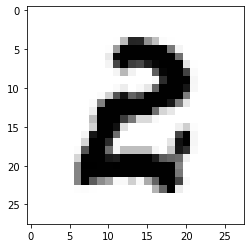

In [4]:
# Lab 7 Learning rate and Evaluation
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) # 축1로 합을 구함
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # 두 값이 같은지 비교
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15 
batch_size = 100 # batch_size로 잘라서 학습
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

        
    print("Learning finished")

    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
